# Give me some credit dataset

-------------------------------------------------------------------------
        Noélie DEBS, Alexandre DELACHE, Guillaume DURIEU, Matthieu MERINIS
--------------------------------------------------------------------------

## Chargement des librairies

Pour cette analyse nous allons avoir besoin des librairies de calculs (panda et numpy), de graphiques (matplotlib et seaborn) et de scikit learn pour le machine learning.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit learn librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

%matplotlib inline

Nous chargons les bases de données dont nous allons avoir besoin.

In [2]:
df_test= pd.read_csv('cs-test.csv')
df= pd.read_csv('cs-training.csv')
dftmp=pd.read_csv('cs-training.csv')
sample_entry=pd.read_csv('sampleEntry.csv')

Commencons par afficher les dimensions de la base de donnée.

In [3]:
df.shape

(150000, 12)

Puis les 10 premiers éléments du dataset.

In [4]:
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Enfin une description mathématique des données.

In [5]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Regardons à présent les 5 premières valeurs du dataframe sample_entry.csv

In [6]:
sample_entry.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


Il s'agit de la probabilité de défaut calculé par la banque pour chaque individu. Nous n'utiliserons évidement pas cette donnée puisqu'elle a déjà été calculée par la banque elle même !

Affichons les colonnes de notre base.

In [7]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Nous nous intéressons au type de chaque variable.

In [8]:
df.dtypes.value_counts()

int64      8
float64    4
dtype: int64

Il n'y a que des valeurs numériques, cela facilitera grandement le traitement de la base.

Regardons maintenant le nombre de valeurs nulles par colonne

In [9]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Nous remarquons quelque chose de problématique. Il manque près de 30 000 valeurs pour le salaire, soit environ 20% des valeurs. Il est pourtant évident que cette donnée est cruciale pour réussir notre classification. Après plusieurs essais, nous en avons conclu que la méthode de la médiane était la plus efficace pour gérer ces valeurs manquantes. Nous effectuerons cette opération par la suite.

Afin d'avoir un vue claire de la répartition des données, nous avons écrit une fonction afin d'afficher la valeur de chaque cellule pour chaque catégorie.

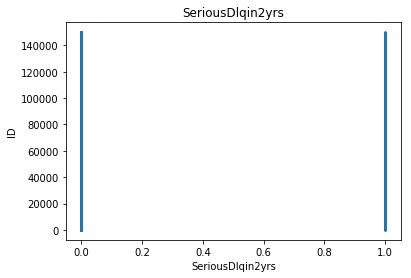

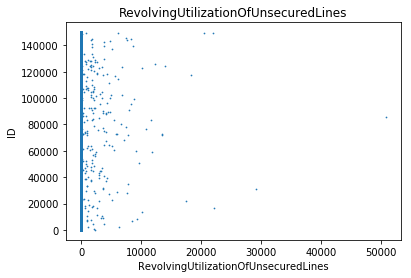

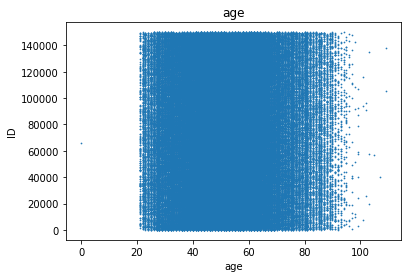

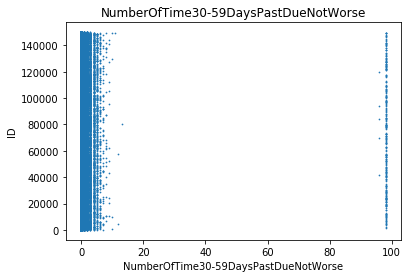

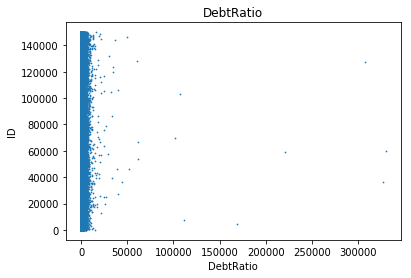

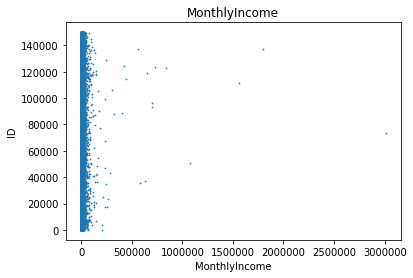

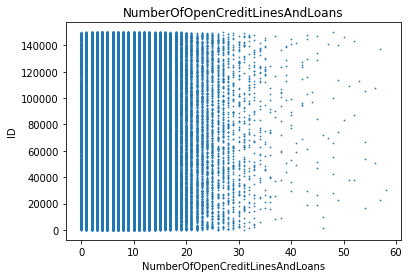

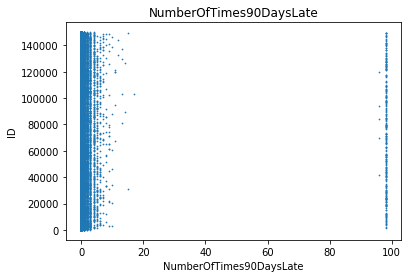

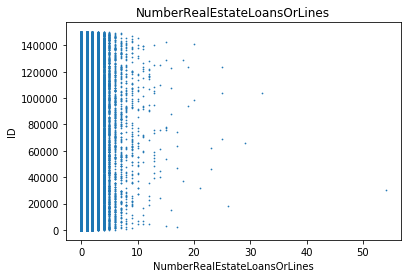

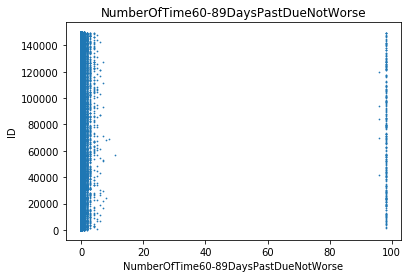

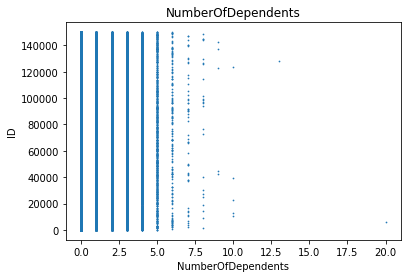

In [10]:
#A function to print every graph with the ID as 
def print_all_values():
    df1=df.drop('Unnamed: 0',axis=1)
    cols=df1.columns
    for col in cols:
        if (df[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(df[[col]],df['Unnamed: 0'],alpha=1,s=0.5)
            plt.title(col)
            ax1 = ax1.set(xlabel=col, ylabel='ID')
            plt.show()
            
            
print_all_values()

Nous pouvons supprimer les valeurs "aberrantes" de la base de donnée. Cela nous aidera à améliorer les prédictions de nos modèles. Pour nous aider dans cette tâche nous avons créé une fonction qui supprime les valeurs qui paraissent trop extrêmes. Elle prend en paramètre la limite maximum qu'une valeur peut prendre en fonction des autres valeurs du même feature.

In [11]:
print(df.shape)
def delete_absurd_values(df_transformed,cols,max_value,percentage):
        
        
        for col in cols:
            if (df_transformed[col].dtypes !='object'):
                       
                q99=df_transformed[col].quantile(q=percentage)
                q01=df_transformed[col].quantile(q=(1-percentage))
                for i in df_transformed.index:
                    
                    if (df_transformed.loc[i,col]> max_value*q99 or df_transformed.loc[i,col]< q01/max_value):
                        df_transformed=df_transformed.drop(index=i)
        
        return df_transformed

cols=['DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents']
df=delete_absurd_values(df,cols,4,0.999)
print(df.shape)

(150000, 12)
(149969, 12)


On fini par supprimer manuellement les valeurs qui parraissent toujours aberrantes.

In [12]:
df=df[df.RevolvingUtilizationOfUnsecuredLines <30000]
df=df[df.DebtRatio <100000]
df=df[df.MonthlyIncome <15000000]
df=df[df.NumberRealEstateLoansOrLines <40]

En ce qui concerne les valeurs manquantes, comme nous l'avons dit précédement, nous avons décidé de les remplacer par la valeur médiane de chaque classe. Avant cela, nous avons essayé plusieurs techniques, parmis elles : de les supprimer, supprimer la colonne, remplacer par la moyenne, remplacer par un constante.

In [13]:
df.fillna(df.median(), inplace=True)

On vérifie qu'il ne reste plus de valeur nulles

In [14]:
df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Vérifions que la répartition de la target est inchangée

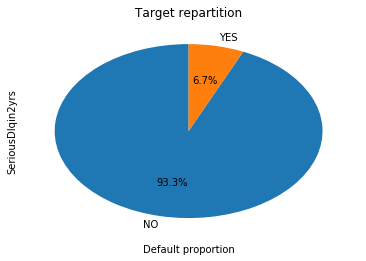

In [15]:
fig11=plt.figure()
ax11=plt.axes()
the_target = dftmp['SeriousDlqin2yrs']
the_target.replace(to_replace=[1,0], value= ['YES','NO'], inplace = True)
plt.title('Target repartition')
ax11 = ax11.set(xlabel='Default proportion', ylabel='Number of people')
the_target.value_counts().plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()

#### Graphiques comparés

In [16]:
sns.set(style = 'whitegrid', context = 'notebook', rc={'figure.figsize':(20,15)})


cols = ['SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

#sns.pairplot(df[cols])
plt.show()

Le nombre important de features rend difficile une lecture intelligible de ce graphique. Nous préférerons utiliser une matrice de corrélation pour comprendre le lien entre les features.

#### Matrice de Corrélation

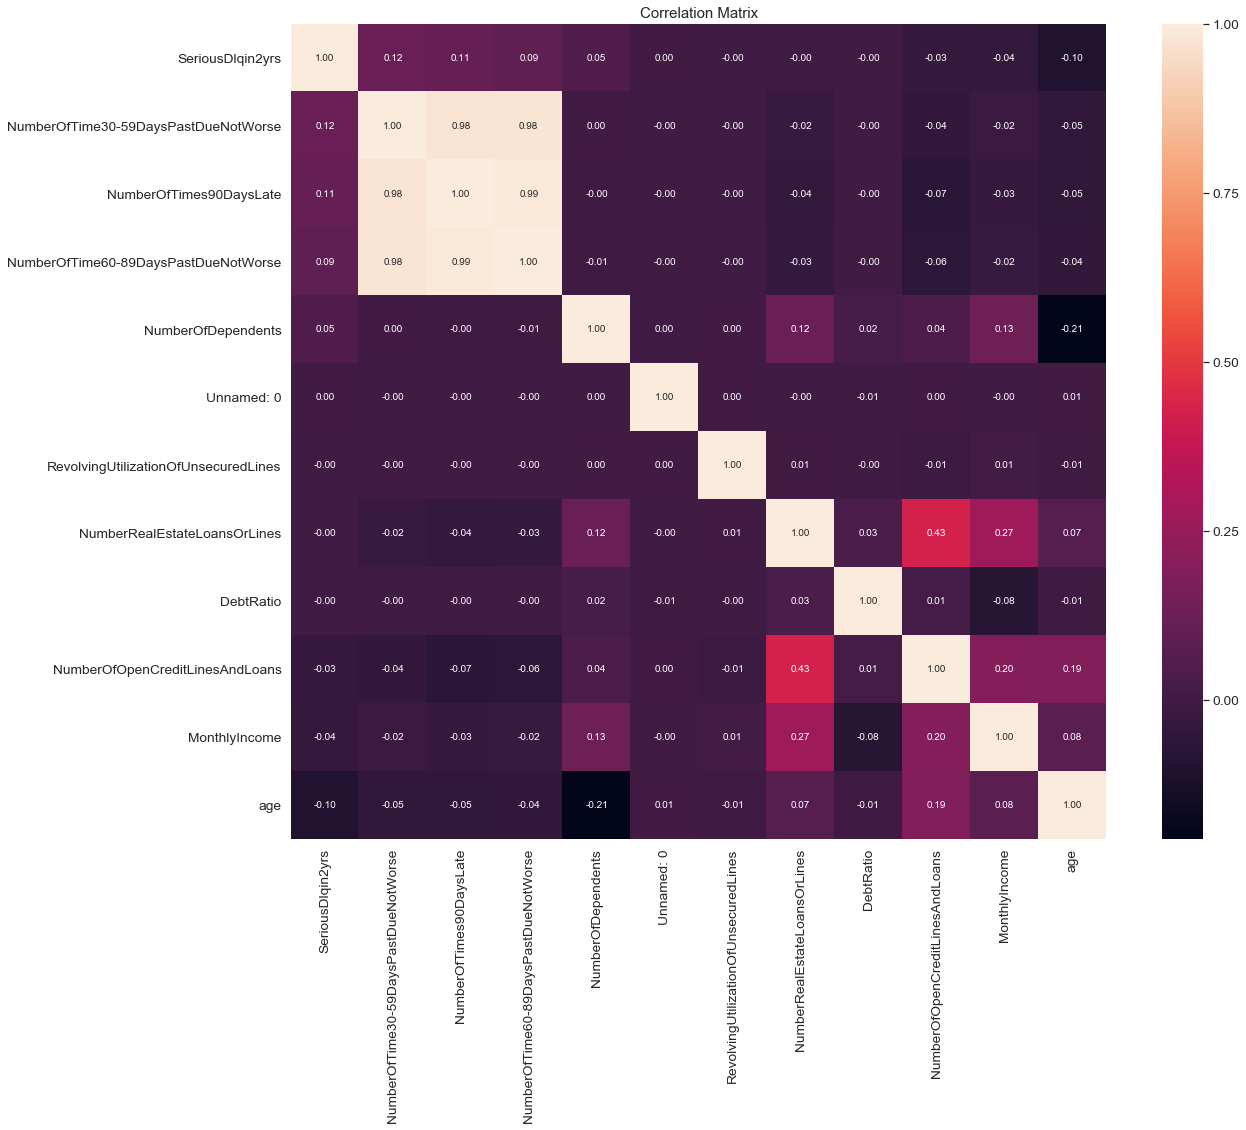

In [17]:
#Correlation Matrix calcul
corr_mat = df.corr()

fig2=plt.figure()
sns.set(rc={'figure.figsize':(25,15)})
k = 20
cols = corr_mat.nlargest(k, 'SeriousDlqin2yrs')['SeriousDlqin2yrs'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix')
plt.show()

Grâce à cette matrice de corrélation on remarque que les features qui ont la plus grande influence sur la target sont l'age et d'avoir fait défaut pas le passer. Etonnement le salaire ne semble pas à première vue avoir un grand impact. Cependant ces coefficients restent relativement faibles.

On notera également qu'il y a un très grande corrélation entre les differents temps de défaut de crédit.

## Séparer les données entre les donnée d'entrainement et de test

In [18]:
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

On utilise 80% du dataset pour entrainer notre algorithme et 20% pour effectuer les tests. On donne un random_state pour qu'à chaque execution de la fonction, celle-ci sépare les données de la meme facon et ainsi on introduit un biais constant à chaque itération.

---------------------------------------------------------------------------------------------
#                  Algorithmes de Machine Learning
----------------------------------------------------------------------------------------------

## Regression Logistique

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100,random_state=0)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Score et erreur

In [20]:
#ERROR
error = (1 - logisticRegr.score(X_test, y_test))*100
print('Score  = ',logisticRegr.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  93.08108108108108 % 
Erreur = 6.918919 %


## LDA

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(solver='svd',shrinkage=None,store_covariance=True)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

#### Score et erreur

In [22]:
#ERROR
error = (1 - lda.score(X_test, y_test))*100
print('Score  = ',lda.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  93.1933471933472 % 
Erreur = 6.806653 %


## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rf.fit(X_train,y_train)

C:\Users\merin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#### Score et erreur

In [24]:
error = (1 - rf.score(X_test, y_test))*100
print('Score  = ',rf.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  93.47609147609147 % 
Erreur = 6.523909 %


## Tree Decision Classifier

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#### Score et erreur

In [26]:
error = (1 - clf.score(X_test, y_test))*100
print('Score  = ',clf.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  89.46777546777547 % 
Erreur = 10.532225 %


# Résultats

Après entrainement de nos algorithmes, nous avons obtenu les résultats suivants sur le jeu de test:

In [27]:
print('Taux de réussite par modèle:\n\nRégression Logistique:',logisticRegr.score(X_test, y_test)*100,'%','\n\nLDA:',lda.score(X_test, y_test)*100,'%','\n\nRandom Forest Classifier:',rf.score(X_test, y_test)*100,'%','\n\nDecision Tree Classifier:',clf.score(X_test, y_test)*100,'%')

Taux de réussite par modèle:

Régression Logistique: 93.08108108108108 % 

LDA: 93.1933471933472 % 

Random Forest Classifier: 93.47609147609147 % 

Decision Tree Classifier: 89.46777546777547 %
